# Tornado trends in Midwestern states

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

First, load the file `noaa_data_cleaned.csv` (from the "Data cleaning" notebook):

In [2]:
df = pd.read_csv('noaa_data_cleaned.csv')
df = df.drop(['Unnamed: 0'], axis=1)

Now focus on the 12 Midwestern states (using the Census Bureau's definition at https://en.wikipedia.org/wiki/Midwestern_United_States):

In [3]:
g = df.groupby(['Year', 'State'])
df = g.count().unstack().droplevel(0, axis=1)
df = df.fillna(0)
midwestern_states = [
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan',
    'Minnesota', 'Missouri', 'Nebraska', 'North Dakota',
    'Ohio', 'South Dakota', 'Wisconsin'
]
df = df[midwestern_states]
df.head()

State,Illinois,Indiana,Iowa,Kansas,Michigan,Minnesota,Missouri,Nebraska,North Dakota,Ohio,South Dakota,Wisconsin
Year,,,,,,,,,,,,
1950,11.0,3.0,4.0,33.0,0.0,1.0,6.0,6.0,2.0,3.0,1.0,6.0
1951,5.0,5.0,5.0,77.0,8.0,4.0,6.0,9.0,2.0,3.0,2.0,7.0
1952,4.0,2.0,6.0,21.0,0.0,11.0,11.0,11.0,11.0,2.0,5.0,1.0
1953,5.0,9.0,32.0,30.0,20.0,10.0,6.0,49.0,10.0,8.0,12.0,9.0
1954,9.0,32.0,19.0,68.0,12.0,7.0,40.0,19.0,4.0,13.0,16.0,13.0


Compute the 10-year rolling average for each state:

In [4]:
df = df.rolling(10).mean().dropna()
df.head()

State,Illinois,Indiana,Iowa,Kansas,Michigan,Minnesota,Missouri,Nebraska,North Dakota,Ohio,South Dakota,Wisconsin
Year,,,,,,,,,,,,
1959,20.7,17.1,13.9,59.0,10.9,9.8,25.2,31.9,8.8,7.1,9.4,11.8
1960,23.9,18.1,16.4,61.8,11.5,10.4,28.5,35.6,10.2,7.5,10.2,12.3
1961,28.0,21.5,17.5,59.0,11.2,10.8,32.2,35.9,10.2,9.2,11.4,12.6
1962,28.9,22.8,18.1,63.2,11.7,11.2,33.3,39.2,10.0,9.4,14.8,13.4
1963,29.9,25.2,16.4,63.3,10.2,10.9,34.3,36.0,9.5,10.5,14.5,13.5


Let's visualize the state-by-state rolling averages:

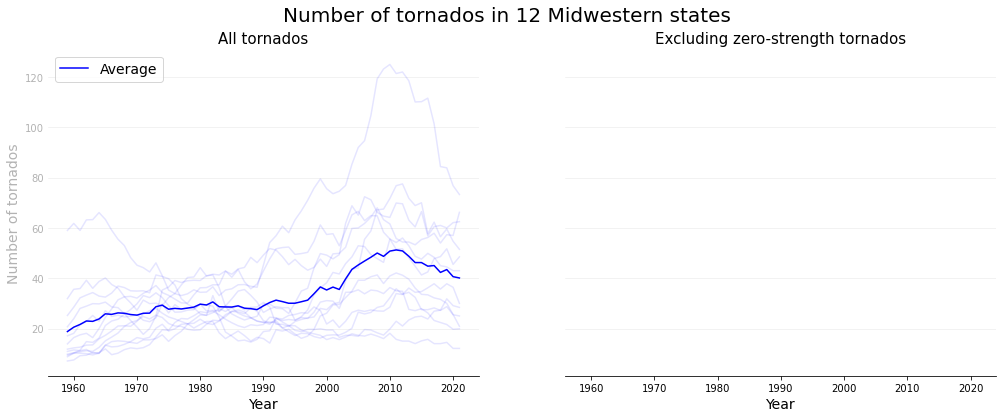

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(17, 6), sharex=True, sharey=True)

# Left panel
plt.sca(axs[0])
yticks = range(20, 121, 20)
for y in yticks:
    plt.axhline(y, linewidth=0.5, color='k', alpha=0.1)
plt.plot(df.index, df, color='b', alpha=0.1)
plt.plot(df.index, df.mean(axis=1), 'b-', label='Average', alpha=1)
ax = plt.gca()
plt.legend(fontsize=14, loc='upper left')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of tornados', alpha=0.3, fontsize=14)
for text in ax.get_yticklabels():
    text.set_alpha(0.3)
fig.suptitle('Number of tornados in 12 Midwestern states', fontsize=20)
ax.set_title('All tornados', fontsize=15)
ax.set_yticks(yticks)
ax.tick_params(axis='y', length=0)
for x in ['top', 'left', 'right']:
    ax.spines[x].set_visible(False)
    
# Right panel
plt.sca(axs[1])
plt.xlabel('Year', fontsize=14)
plt.title('Excluding zero-strength tornados', fontsize=15)
for y in yticks:
    plt.axhline(y, linewidth=0.5, color='k', alpha=0.1)
ax = axs[1]
ax.tick_params(axis='y', length=0)
for x in ['top', 'left', 'right']:
    ax.spines[x].set_visible(False)

plt.show()

To see if removing small tornadoes from the record really eliminate the long-term increasing trend, drop all records with 'Strength' = 0:

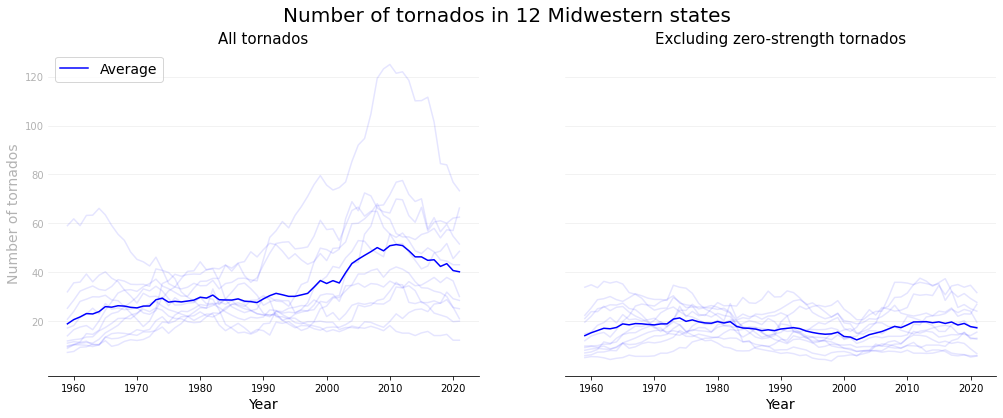

In [6]:
# Reload the data
df = pd.read_csv('noaa_data_cleaned.csv')
df = df.drop(['Unnamed: 0'], axis=1)

# Drop those with zero strength
df = df[df['Strength'] > 0]

g = df.groupby(['Year', 'State'])
df = g.count().unstack().droplevel(0, axis=1)
df = df.fillna(0)
midwestern_states = [
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan',
    'Minnesota', 'Missouri', 'Nebraska', 'North Dakota',
    'Ohio', 'South Dakota', 'Wisconsin'
]
df = df[midwestern_states]

df = df.rolling(10).mean().dropna()

# Plot
plt.sca(axs[1])
plt.plot(df.index, df, color='b', alpha=0.1)
plt.plot(df.index, df.mean(axis=1), 'b-', label='Average', alpha=1)
plt.savefig('analysis_midwestern.png', format='png', facecolor='white')

Indeed, after removing tornados of strength 0 from the data, there is no clear evidence of increasing number of tornadoes.